<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Project_2_Part_2_Stanslus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
filename = '/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/Food Security Nationals.xlsx'
#File has headers
df = pd.read_excel(filename)
df.head()

,a_date,a_state,a_county,a_payam,a_context,a_poptype,a_camp,a_camp_oth,a_activity,a_interview_mode,...,total_fexcari,fexcari,expgroup,stress,crisis,emergency,caricop,fcsgtoCarig,fs,_index
0,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Bentiu town,NaN,GFD activities,NaN,...,68300.0,60.0,2,0,0,1,3.0,1,2.00,1
1,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Bentiu town,NaN,GFD activities,NaN,...,26900.0,89.0,4,0,0,1,4.0,4,4.00,2
2,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Rubkona town,NaN,GFD activities,NaN,...,53500.0,79.0,4,0,0,1,4.0,1,2.50,3
3,2022-06-09,Unity,Rubkona,Bentiu Town,Community village (host/IDPs),NaN,Bentiu town,NaN,GFD activities,NaN,...,31600.0,69.0,3,0,0,1,3.5,3,3.25,4
4,2022-06-10,Lakes,Awerial,Puluk,Community village (host/IDPs),NaN,Mingkaman,NaN,GFD activities,NaN,...,84000.0,43.0,1,0,0,0,1.0,4,2.50,5


In [5]:
#Set pandas to show all rows of results
pd.set_option('display.max_rows', None)

In [6]:
df.shape

(3186, 1454)

In [9]:
#Drop columns which have majority as null
df = df.loc[:, df.isnull().sum()/len(df)<0.50]

In [10]:
df.shape

(3186, 1062)

In [11]:
df.dtypes

a_date                                                                                                                                      datetime64[ns]
a_state                                                                                                                                             object
a_county                                                                                                                                            object
a_payam                                                                                                                                             object
a_context                                                                                                                                           object
a_camp                                                                                                                                              object
a_activity                                                            

In [57]:
#REMOVE UNNECESARRY
#Keep only the relevant variables and Features based on literature review OF JOURNALS OF FOOD SECURITY 
# Family size, sex of HH head, level of education, age of the household head, number and types of communication media, income, numbers of livestock, cultivated land size, access to credit, flooding, conflict, 
#Received assistance, Food security group, land planted previous year, main source of livelihood, experience food shock, county, source of cereals, CARI Category

In [59]:
df = df[['a_county','respdnt_sex','respdnt_age','assist_received', 'head_marital','hh_size','totalhh','c_hh_ill','o_acc_med', 'H01','c_house', 'farm_animal', 'meals_adults', 'sourceCER', 'mkt_distance', 's_shock', 'sers_1', 'cari' ]]
#Look at age of HH head, proportion eaten, cattle owned, gfarm area, comarea,

In [60]:
#Check duplicates
df.duplicated().sum()
#Drop duplicate
df = df.drop_duplicates()
df.duplicated().sum()

0

In [70]:
#Rename certain variable names  to clear names
df = df.rename(columns = {'a_county': 'Count Name','respdnt_sex': 'Respondent sex','respdnt_age': 'Respondent age','assist_received': 'Received WFP assistance', 'head_marital': 'Marital status',\
                          'hh_size': 'Household size','totalhh': 'Total HH Members','c_hh_ill': 'HH has chronically ill member','o_acc_med': 'Access to medicine & health','H01': 'Main economic activity',\
                          'c_house': 'Type of house', 'farm_animal': 'Has farm animals', 'meals_adults': 'Meals eaten by adults', 'sourceCER': 'Source Cereals', 'mkt_distance': 'Distance to markets',\
                          's_shock': 'Main shock', 'sers_1' : 'Can bounce back', 'cari': 'Food security status'})



In [71]:
#Check data types
df.dtypes

Count Name                        object
Respondent sex                    object
Respondent age                     int64
Received WFP assistance           object
Marital status                    object
Household size                   float64
Total HH Members                 float64
HH has chronically ill member     object
Access to medicine & health       object
Main economic activity            object
Type of house                     object
Has farm animals                  object
Meals eaten by adults            float64
Source Cereals                    object
Distance to markets              float64
Main shock                        object
Can bounce back                   object
Food security status              object
dtype: object

In [73]:
#Check and replace missing values
df.isnull().sum()

Count Name                         0
Respondent sex                     0
Respondent age                     0
Received WFP assistance            4
Marital status                    17
Household size                    17
Total HH Members                  17
HH has chronically ill member     17
Access to medicine & health       21
Main economic activity            17
Type of house                     21
Has farm animals                  17
Meals eaten by adults             17
Source Cereals                    37
Distance to markets              240
Main shock                        17
Can bounce back                   17
Food security status               0
dtype: int64

In [75]:
#Few missing values. Replace the continpus variables and the categorical variables using 
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer

In [76]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [79]:
#Obtain Categorical values from test data
cat_selector = make_column_selector(dtype_include='object')
df_cat  = df[cat_selector(df)]
df_cat.head()

,Count Name,Respondent sex,Received WFP assistance,Marital status,HH has chronically ill member,Access to medicine & health,Main economic activity,Type of house,Has farm animals,Source Cereals,Main shock,Can bounce back,Food security status
0,Rubkona,Female,Yes,Married/Partner,No,Yes,Food assistance/Sale of food assistance,Straw hut,No,Market (Purchase cash or credit),High food prices Delayed assistance distributions,Agree,Marginally food secure
1,Rubkona,Female,Yes,Widowed,No,Yes,Food assistance/Sale of food assistance,Rakooba/Improvised Shelter,No,Support from neighbors/relatives,"Floods, heavy rains, landslides High food pric...",Agree,Severely food insecure
2,Rubkona,Female,Yes,Widowed,No,Yes,Food assistance/Sale of food assistance,Rakooba/Improvised Shelter,No,Market (Purchase cash or credit),"Floods, heavy rains, landslides High food pric...",Agree,Moderately food insecure
3,Rubkona,Female,Yes,Divorced/Separated,No,Yes,Food assistance/Sale of food assistance,Straw hut,No,Market (Purchase cash or credit),Human sickness/death,Agree,Moderately food insecure
4,Awerial,Male,Yes,Married/Partner,No,No,Food assistance/Sale of food assistance,Rakooba/Improvised Shelter,Yes,Food assistance,High food prices Food shortages/reduced distri...,Neutral,Moderately food insecure


In [80]:
#Extract Numeric Values 
cat_selector = make_column_selector(dtype_include='number')
df_num  = df[cat_selector(df)]
df_num .head()

,Respondent age,Household size,Total HH Members,Meals eaten by adults,Distance to markets
0,32,6.0,6.0,2.0,35.0
1,48,9.0,9.0,2.0,60.0
2,41,10.0,10.0,2.0,30.0
3,33,11.0,11.0,2.0,15.0
4,68,5.0,5.0,2.0,30.0


In [81]:
#REPLACE ANY MISSING VALUES 
#instantiate SimpleImputers with most_frequent and mean strategies
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [83]:
 #Impute for missing numeric variables 
df_num = pd.DataFrame(mean_imputer.fit_transform(df_num), columns = df_num.columns)
df_num.isnull().sum()

Respondent age           0
Household size           0
Total HH Members         0
Meals eaten by adults    0
Distance to markets      0
dtype: int64

In [84]:
 #Impute for missing Categorical variables 
df_cat = pd.DataFrame(freq_imputer.fit_transform(df_cat), columns = df_cat.columns)
df_cat.isnull().sum()

Count Name                       0
Respondent sex                   0
Received WFP assistance          0
Marital status                   0
HH has chronically ill member    0
Access to medicine & health      0
Main economic activity           0
Type of house                    0
Has farm animals                 0
Source Cereals                   0
Main shock                       0
Can bounce back                  0
Food security status             0
dtype: int64

In [85]:
#Concatenate Numerical and Categorical data
# Combine the categorical and numerical dataframes
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,Respondent age,Household size,Total HH Members,Meals eaten by adults,Distance to markets,Count Name,Respondent sex,Received WFP assistance,Marital status,HH has chronically ill member,Access to medicine & health,Main economic activity,Type of house,Has farm animals,Source Cereals,Main shock,Can bounce back,Food security status
0,32.0,6.0,6.0,2.0,35.0,Rubkona,Female,Yes,Married/Partner,No,Yes,Food assistance/Sale of food assistance,Straw hut,No,Market (Purchase cash or credit),High food prices Delayed assistance distributions,Agree,Marginally food secure
1,48.0,9.0,9.0,2.0,60.0,Rubkona,Female,Yes,Widowed,No,Yes,Food assistance/Sale of food assistance,Rakooba/Improvised Shelter,No,Support from neighbors/relatives,"Floods, heavy rains, landslides High food pric...",Agree,Severely food insecure
2,41.0,10.0,10.0,2.0,30.0,Rubkona,Female,Yes,Widowed,No,Yes,Food assistance/Sale of food assistance,Rakooba/Improvised Shelter,No,Market (Purchase cash or credit),"Floods, heavy rains, landslides High food pric...",Agree,Moderately food insecure
3,33.0,11.0,11.0,2.0,15.0,Rubkona,Female,Yes,Divorced/Separated,No,Yes,Food assistance/Sale of food assistance,Straw hut,No,Market (Purchase cash or credit),Human sickness/death,Agree,Moderately food insecure
4,68.0,5.0,5.0,2.0,30.0,Awerial,Male,Yes,Married/Partner,No,No,Food assistance/Sale of food assistance,Rakooba/Improvised Shelter,Yes,Food assistance,High food prices Food shortages/reduced distri...,Neutral,Moderately food insecure


In [86]:
df.dtypes

Respondent age                   float64
Household size                   float64
Total HH Members                 float64
Meals eaten by adults            float64
Distance to markets              float64
Count Name                        object
Respondent sex                    object
Received WFP assistance           object
Marital status                    object
HH has chronically ill member     object
Access to medicine & health       object
Main economic activity            object
Type of house                     object
Has farm animals                  object
Source Cereals                    object
Main shock                        object
Can bounce back                   object
Food security status              object
dtype: object

**`UNIVARIATE VISUALS `**

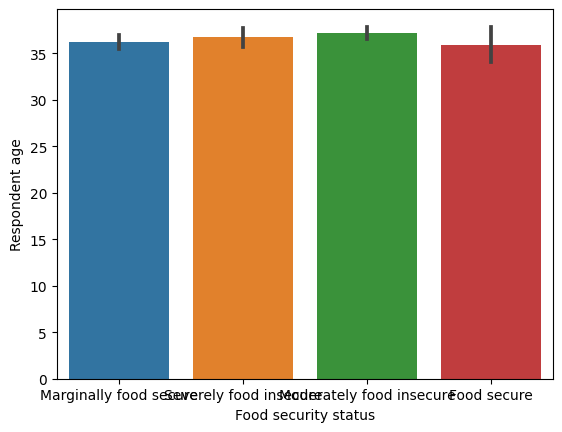

In [87]:
#Bar graph for the  the taraget variable 
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
 
#Food security by age of respondent
sns.barplot(x = 'Food security status',
            y = 'Respondent age',
            data = df)
 # Show the plot
plt.show()

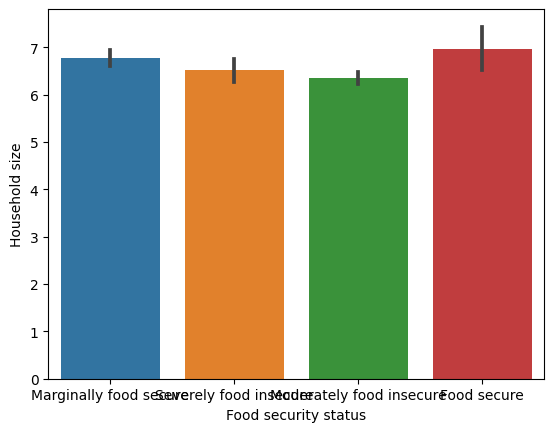

In [89]:
#Food security by HH size
sns.barplot(x = 'Food security status',
            y = 'Household size',
            data = df)
 # Show the plot
plt.show()